In [13]:
import os
import cv2
import re
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from trim_dataset import TrimDataset
import random

In [26]:
def plot_mosaic_from_dir(dir_path: str, images_per_class=2) -> None:
    """
    Displays a mosaic of images from the specified root directory, with 2 images per class.

    Args:
        dir_path (str): Path to the root directory containing the images.
        images_per_class (int): Number of images to display per class.
    """
    rows, cols = 5, images_per_class * 2
    image_shape = (256, 256)
    images = []
    class_images = {}

    # Iterate through images in the directory and group them by class
    for folder_name in os.listdir(dir_path):
        for image_name in os.listdir(dir_path+ '/' + folder_name):
            # Extract class code from image name using regex
            match = re.match(r'^\d+', image_name)
            if match is None:
                continue
            class_code = match.group()

            # Initialize list for each class if not already
            if class_code not in class_images:
                class_images[class_code] = []

            if len(class_images[class_code]) < images_per_class:
                image_path = os.path.join(dir_path+ '/' + folder_name, image_name)
                image = io.imread(image_path)
                image = transform.resize(image, image_shape)
                class_images[class_code].append(image)
            
            if len(class_images) == rows * cols:
                break

    # Flatten the list of images in class order
    for class_code in sorted(class_images.keys()):
        images.extend(class_images[class_code])

    # Plot the images in a grid
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    for ax, img in zip(axes.flatten(), images):
        ax.imshow(img)
        ax.axis('off')

    plt.tight_layout()
    plt.show()



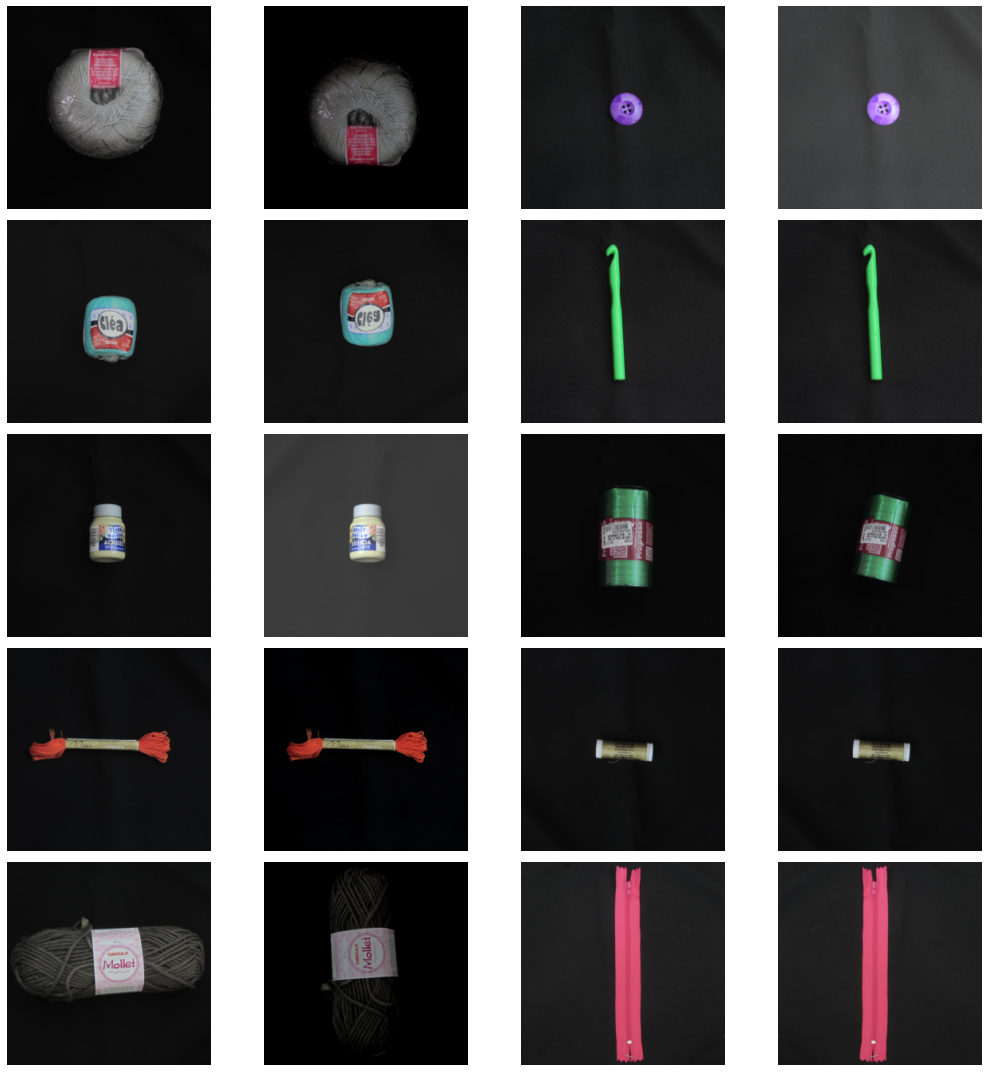

In [27]:
plot_mosaic_from_dir('augmented_dataset')

In [29]:

def plot_mosaic_from_dataset(dataset, data_type='images', plot_bbox=True, cols=5, rows=2) -> None:
    """
    Plot a mosaic of images or masks from the dataset. The images and masks are randomly selected, one per class.

    Args:
        dataset (TrimDataset): The dataset object.
        data_type (str): The type of data to plot. It can be 'images' or 'masks'.
        plot_bbox (bool): Whether to plot the bounding box or not.
        cols (int): The number of columns in the plot.
        rows (int): The number of rows in the plot.
    """
    plt.figure(figsize=(15, 6))

    # Get category IDs and names
    category_ids = list(dataset.categories.keys())
    category_names = list(dataset.categories.values())

    for i, (category_id, category_name) in enumerate(zip(category_ids, category_names)):
        if i >= cols * rows:
            break

        # Get all images for the current category
        images_for_category = [img for img in dataset.images if img.category_id == category_id]
        if not images_for_category:
            continue

        # Randomly select an image from the category
        selected_image = random.choice(images_for_category)
        print(selected_image.file_name)

        # Plot the image or mask
        plt.subplot(rows, cols, i + 1)
        image_to_plot = selected_image.content if data_type == 'images' else selected_image.mask

        if data_type == 'images':
            plt.imshow(cv2.cvtColor(image_to_plot, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(image_to_plot, cmap='gray')

        # Plot the bounding box if enabled
        if plot_bbox:
            bbox = selected_image.bbox
            rect = patches.Rectangle(
                (bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='g', facecolor='none'
            )
            plt.gca().add_patch(rect)

        # Set the title to the category name
        plt.title(category_name)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


0-05-V2-W.png-augmented-7a4c.png
1-01-V1-W.png
2-01-V2-W.png-augmented-23eb.png
3-03-V1-B.png-augmented-bebf.png
4-04-V1-B.png-augmented-8a61.png
7-05-V1-W.png-augmented-1007.png
8-05-V2-W.png
9-05-V2-B.png-augmented-10dd.png
5-03-V1-B.png-augmented-a3b4.png
6-01-V1-B.png


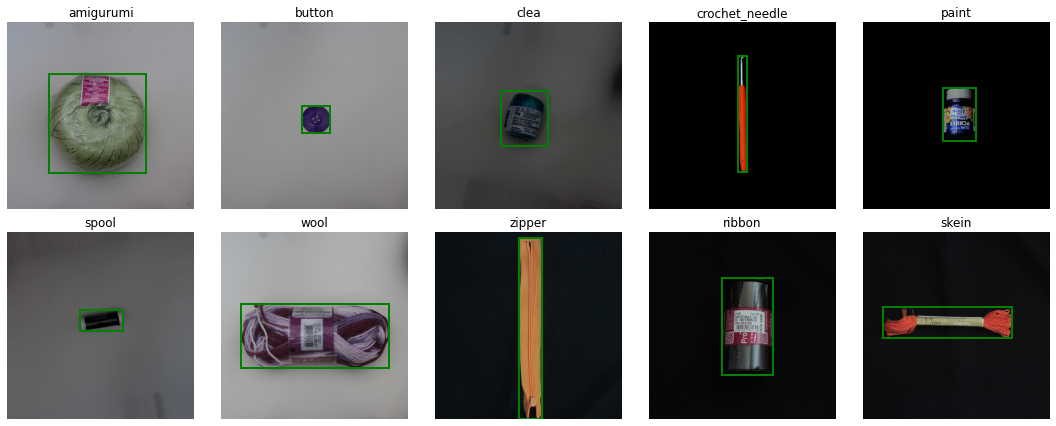

In [30]:
dataset = TrimDataset('augmented_dataset', os.path.join('output', 'annotations.json'))

plot_mosaic_from_dataset(dataset)